# Exploratory Data Analysis
### Geographically-focused Graphics using Plotly and GeoJSON

Code for producing the Plotly graphs is included in a separate notebook (Lucy-EDA-generation-only.ipynb). It can be uncommented and run to view interactive versions of these choropleths. The images included in this notebook are static to save space, as Github does not work well with extremely large files.

## Table of contents
1. [Overview](#Overview)
2. [Total Population](#totalpop)
3. [Voter Turnout](#voterturnout)
4. [Democratic vs Republican Votes](#partyvotes)
5. [Economic Factors](#econ)
    1. [Unemployment](#unemp)
    2. [Median Income](#medinc)
6. [Demographic Factors](#demo)
    1. [Hispanics](#hisp)
    2. [Black Women](#blwom)

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
# read in cleaned and combined dataset
full = pd.read_csv("./Data Collection/combined_df.csv")

# Overview <a name="Overview"></a>

Texas is a Southern US state with a population of over 29 million people, making it the second most populous US state. It shares its southern and some of its western border with Mexico.
Its high population corresponds to 38 electoral votes in a general election, a healthy chunk of the 270 a candidate needs to cinch the US presidency.

Texas's unique position as such a large state paired with its shifting demographics and voting policies has made it a political point of interest in regards to voting. Going forward, we will be exploring voter turnout and party voting percentages in the state, as well as some of their major contributing factors. [source](https://en.wikipedia.org/wiki/Texas)

### Map of Texas
[source](https://www.tourtexas.com/texas-maps/map-of-texas-cities)
<img src="static plotly graphs/texasCities.gif" />


Above is a map of Texas state, in order to show some of its most prominent cities as reference for following graphs.

### Total Population <a name="totalpop"></a>
#### 2012
<img src="static plotly graphs/pop_2012.png" />

#### 2020
<img src="static plotly graphs/pop_2020.png" />

While the population in Texas's counties increases over time, overall populations remain concentrated in several major urban areas:
- In the Northeast, around Fort Worth and Dallas,
- In the center of the state, around Austin and San Antonio,
- To the East, near Houston, and
- To the South, around Brownsville.

# Voter Turnout <a name="voterturnout"></a>

Voter turnout has many complex underlying factors, and can vary widely by region. Some major factors include socioeconomic status, age, and race [(source).](https://www.fairvote.org/what_affects_voter_turnout_rates)

### Voter Turnout Rates By County
#### 2012
<img src="static plotly graphs/voted_perc_2012.png" />

#### 2016
<img src="static plotly graphs/voted_perc_2016.png" />

#### 2020
<img src="static plotly graphs/voted_perc_2020.png" />

In [4]:
full[['2012_voted_perc', '2016_voted_perc', '2020_voted_perc']].describe().T

,count,mean,std,min,25%,50%,75%,max
2012_voted_perc,254.0,0.576011,0.076378,0.3039,0.529750,0.58395,0.623350,0.8422
2016_voted_perc,254.0,0.587839,0.078787,0.2939,0.540300,0.59340,0.637775,0.8949
2020_voted_perc,254.0,0.651735,0.078754,0.3459,0.601725,0.65875,0.702525,0.8689


Voter turnout in Texas generally increased from general election year to general election year. In 2012, the average turnout was 57.6% and slightly increased in 2016 with 58.8%. In 2020, there was a large increase of about 6% turnout, with 65.2% turnout. Variability in turnout from county to county largely stayed the same across the three general election years, with a standard deviation of 8%. Generally, the western-most and southern-most counties observed less turnout in comparison with other counties.

Interestingly, some counties would see abnormally low turnout without an observable pattern over time. Turnout in 2020 was generally higher across the board, though there was one notable exception: Crane County, with Texas's minimum of 34.6% turnout that year.

### Distribution of Turnout
Since we plan to make a regression model predicting voter turnout based on 2012 data, we need to examine the distribution of turnout from that year.

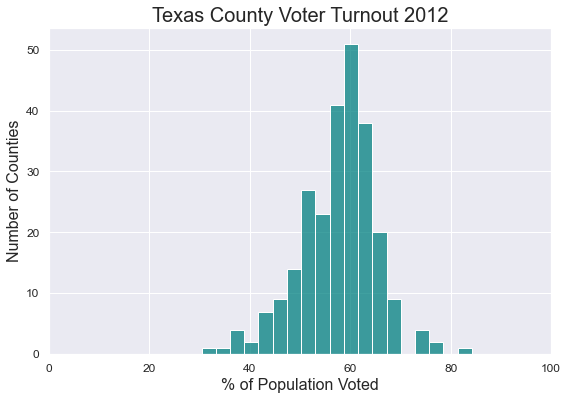

In [5]:
plt.figure(figsize= (9, 6))
sns.histplot(x = full['2012_voted_perc']*100, color = 'teal')
plt.title("Texas County Voter Turnout 2012", size = 20)
plt.xlabel("% of Population Voted", size = 16)
plt.ylabel("Number of Counties", size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlim(0, 100);

Thankfully, the distribution of county voter turnout looks pretty normal and isn't right or left skewed, so no tranformations are needed to meet model assumptions. We can also observe that most counties had about 50-70% voter participation, which is about what we saw in the choropleth.

## Democratic vs Republican Votes <a name="partyvotes"></a>

#### 2012
<img src="static plotly graphs/actual_perc_d_2012.png" />

#### 2016
<img src="static plotly graphs/actual_perc_d_2016.png" />

#### 2020
<img src="static plotly graphs/actual_perc_d_2020.png" />

Overall, we can see that Texas's counties lean red, or Republican. Major urban centers tend to lean more Democratic, or blue, as do the southern and western counties. The northwest area of Texas consistently votes Republican.

One interesting point is that while urban centers swung more towards the Democratic side in 2020 compared to 2012 and 2016, the southern counties moved towards the Republican side.

## Economic Factors <a name="econ"></a>

Wealthier Americans are more likely to be voters, and we can examine this economic data in two ways: unemployment rate and median income.

### Unemployment Rate <a name="unemp"></a>
#### 2012
<img src="static plotly graphs/unemp_2012.png" />

#### 2016
<img src="static plotly graphs/unemp_2016.png" />

#### 2020
<img src="static plotly graphs/unemp_2020.png" />

2020 was an more economically challenging year in terms of unemployment compared to other years, likely due to the COVID-19 pandemic. Unemployment was higher in 2020 across all of Texas' counties than it was in previous years. One trend that endured from 2012 to 2020, however, was that Southern and Southwest Texan counties, most notably Presidio County, consistently observed higher unemployment rates than the rest of the state from across the three general election years.

### Median Income <a name="medinc"></a>
#### 2012-2016
<img src="static plotly graphs/medincome_2012_2016.png" />

#### 2020
<img src="static plotly graphs/medincome_2020.png" />

Median income shows an opposite color pattern to unemployment-- counties with higher median incomes generally also had lower unemployment rates. Wealth is concentrated around Texas's major urban centers and in the Northern counties. It is worth noting that these choropleths exhibit similar patterns to the overall voter turnout choropleths, giving credence to the belief that higher socioeconomic status corresponding to more voter turnout holds true in Texas as well.

## Demographic Factors <a name="demo"></a>

### Hispanics <a name="hisp"></a>
We proceed to examine the Hispanic demographic, as it is widely believed that Texas's growing Hispanic population could potentially shift Texas's voting patterns.

#### 2012
<img src="static plotly graphs/hispanic_2012.png" />

#### 2016
<img src="static plotly graphs/hispanic_2016.png" />

#### 2020
<img src="static plotly graphs/hispanic_2020.png" />

Hispanics tend to compose larger proportions of county population especially in the southern Texan counties near the Texas-Mexico border, as well as in some of Texas's largest cities. It is also apparent by the increasingly yellow-colored counties over time that the slice of populations in each county that are Hispanic has grown from 2012 to 2016 to 2020. If the Hispanic population has an effect on voting patterns in our modeling, we might expect continued voting changes in the future that reflect Texas's changing demographics.

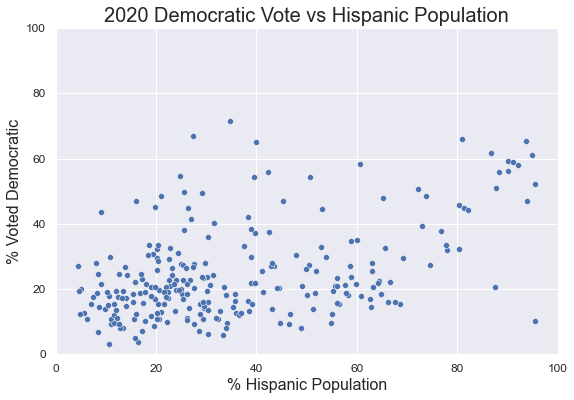

In [7]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = full['hispanic_total_2020']*100,
            y = full['2020_dem_vote_perc']*100)
plt.title("2020 Democratic Vote vs Hispanic Population", size = 20)
plt.xlabel("% Hispanic Population", size = 16)
plt.ylabel("% Voted Democratic", size = 16)
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xticks(size = 12)
plt.yticks(size = 12);

There may be a slight positive correlation between percentage of county population that is hispanic and percentage of county voting Democratic, but we see a lot of variability in voting at any amount of Hispanics. It will be interesting to see whether our model considers hispanic demographics to be a strong Democratic voting predictor.

### Black Women <a name="blwom"></a>
We'd also like to examine the proportion of Black women in Texas, as this demographic is known to lean Democratic [(source).](https://www.pewresearch.org/2020/09/23/the-changing-racial-and-ethnic-composition-of-the-u-s-electorate/)
#### 2012
<img src="static plotly graphs/black_f_2012.png" />

#### 2020
<img src="static plotly graphs/black_f_2020.png" />

Although the population segment of Black women has risen nationally during this time period, this trend is not reflected in Texas as seen by the relatively static colors year to year. However, it is worth noting that counties with high population percentages of Black women are located primarily in East Texas, where the state borders Louisiana. The highest among these is Jefferson County-- 16.54% of its population in 2020 is composed of Black women. 

Curiously, the increased proportion of Black women in eastern Texas is not visually reflected in the choropleths of Texan counties' voter turnout or party votes. If anything, it actually seems to run opposite to the Hispanic demographic choropleths provided above.